# Dataset Analysis

**Imports**


In [ ]:
#@title Imports

import math

import time

import pandas as pd

from scipy.stats import entropy

import seaborn as sb
import matplotlib.pyplot as plt

import numpy as np
from numpy import linalg as np_la

import sklearn as sk

from sklearn.model_selection import KFold as sk_KFold
from sklearn.model_selection import cross_validate as sk_cross_validate
from sklearn.model_selection import train_test_split as sk_train_test_split

from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import classification_report as sk_classification_report

from sklearn.preprocessing import StandardScaler as sk_StandardScaler
from sklearn.preprocessing import MinMaxScaler as sk_MinMaxScaler

from sklearn.neighbors import NearestCentroid as sk_NearestCentroid


from sklearn.cluster import KMeans as sk_KMeans
from sklearn.neural_network import MLPClassifier as sk_MLPClassifier 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as sk_LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as sk_QuadraticDiscriminantAnalysis

**Fuction defining**

In [ ]:
#@title Function Defining

# Ensures the class column is the last on the dataframe
# Standardization so can make generic algorithms
def stdDF(df, cl_name):  
  cl_pos =  list(df.columns).index(cl_name)
  headers = np.array(df.columns)
  new_headers = np.delete(headers, cl_pos)
  new_headers = np.append(headers[cl_pos], new_headers) 
  new_df = df[new_headers]
  new_df.sort_values(by=[cl_name])
  return new_df

**Variable defining**

**Dataframe loading and uniforming**

      image variance  image skewness  image curtosis  entropy  class
0            3.62160         8.66610         -2.8073 -0.44699      0
1            4.54590         8.16740         -2.4586 -1.46210      0
2            3.86600        -2.63830          1.9242  0.10645      0
3            3.45660         9.52280         -4.0112 -3.59440      0
4            0.32924        -4.45520          4.5718 -0.98880      0
...              ...             ...             ...      ...    ...
1367         0.40614         1.34920         -1.4501 -0.55949      1
1368        -1.38870        -4.87730          6.4774  0.34179      1
1369        -3.75030       -13.45860         17.5932 -2.77710      1
1370        -3.56370        -8.38270         12.3930 -1.28230      1
1371        -2.54190        -0.65804          2.6842  1.19520      1

[1372 rows x 5 columns]
      class  image variance  image skewness  image curtosis  entropy
0         0         3.62160         8.66610         -2.8073 -0.44699
1        

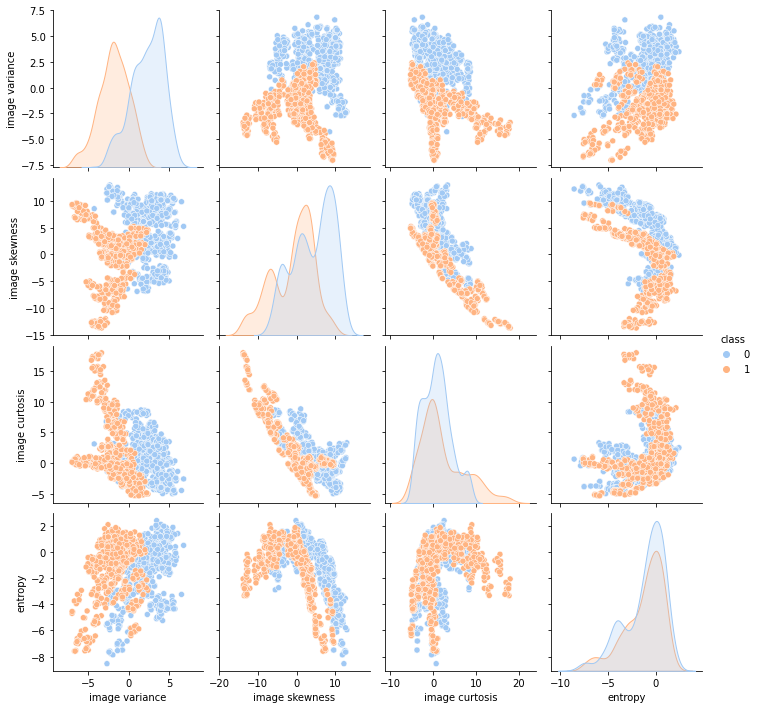

In [ ]:
#@title Variable defining/dataframe loading and uniforming

df_names = ['image variance', 'image skewness', 'image curtosis', 'entropy', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', names = df_names)

cl_name = 'class'
print(df)
df = stdDF(df, cl_name)

cl_list = df.iloc[:,0].unique()

# Toggle data analysis.
# Remove all data and plot printing, only leaving final results
# Useful for performance
show_data = True

if show_data == True:
  print(df)
  grid = sb.pairplot(df, hue = cl_name, palette = 'pastel')


**Studying dataframe**

In [ ]:
#@title Studying dataset

if show_data == True:  
  print("\nDatabase shape:\n",df.shape)
  print("\nDatabase labels:\n",df.columns)
  print(df.info())
  print("\nGeneral Statistics:\n",df.describe())
  print("\nClass sizes:\n",df.groupby([cl_name]).size())
  for cl in cl_list:
    print("\nClass ",cl," Statistics:\n",df.loc[df[cl_name] == cl].describe())
  print("\nThere are NaN values hidden:\n",df.isnull().values.any())


Database shape:
 (1372, 5)

Database labels:
 Index(['class', 'image variance', 'image skewness', 'image curtosis',
       'entropy'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           1372 non-null   int64  
 1   image variance  1372 non-null   float64
 2   image skewness  1372 non-null   float64
 3   image curtosis  1372 non-null   float64
 4   entropy         1372 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

General Statistics:
              class  image variance  image skewness  image curtosis  \
count  1372.000000     1372.000000     1372.000000     1372.000000   
mean      0.444606        0.433735        1.922353        1.397627   
std       0.497103        2.842763        5.869047        4.310030   
min       0.000000       -7.042100      -13.773100       -5.286

**Preliminary data analisys:**


The dataset chosen is a series metrics from banknotes used for banknote authentication

- It has 4 diferent attributes calculated from preprocessed image data.

- The classes are fairly balanced, with 

    762 (55.54%) in class 0  
    610 (44.46%) in class 1

- It is possible to observe some class separation, where it is noticeable how *Image Variance* might be a good class representative, with a class 0 mean value of 2.27 and STD of 2.01, while class 1 mean is -1.86 and STD is 1.88

**Correlation, Covariance and entropy calculus**

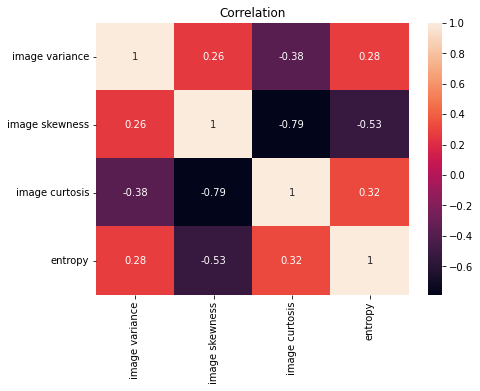

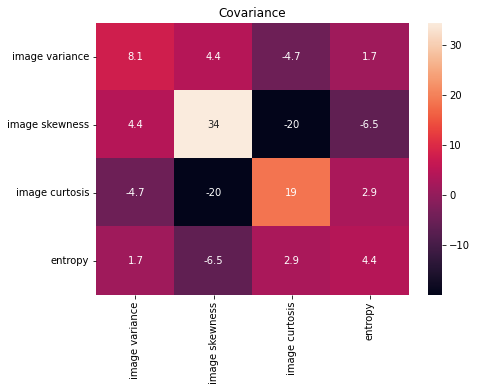

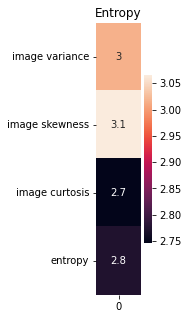

In [ ]:
#@title Correlation, covariance and entropy calculus

def cor_cov_entr(df):
  # Correlation
  df_corr = df.iloc[:,1:].corr()

  if show_data == True:
    plt.figure(figsize=(7,5))
    sb.heatmap(df_corr, annot = True)
    plt.title('Correlation')
    plt.show()

  # Covariance
  df_cov = df.iloc[:,1:].cov()

  if show_data == True:
    plt.figure(figsize=(7,5))
    sb.heatmap(df_cov, annot = True)
    plt.title('Covariance')
    plt.show()

  # Entropy
  df_entrp = []
  for i in range (1, len(df.columns)):
    hist, bin = np.histogram(df.iloc[:,i], density = True)
    df_entrp.append(entropy(hist, base = 2))
  df_entrp = np.array(df_entrp).reshape(len(df.columns) - 1,1)

  if show_data == True:
    plt.figure(figsize=(1,5))
    sb.heatmap(df_entrp, yticklabels = df.columns[1:], annot = True)
    plt.title('Entropy')
    plt.show()

  return df_corr, df_cov, df_entrp

df_corr, df_cov, df_entrp = cor_cov_entr(df)

**Correlation, Covariance and entropy analisys pre-PCA**

- It is observable some strong relations between Curtosis and skewness, where they both correlate well with each other, and have high covariance

**Space transformation (PCA)**


Eingenvalues:
 [49.88014585  9.2972722   1.94936791  4.39083842]
      class          0         1         2         3
0         0   9.141988  1.264562 -0.294390  3.322089
1         0   8.824158  1.581502  1.074513  3.746008
2         0  -2.666161  3.264668  1.999844  1.963318
3         0  10.932646 -0.130023  2.257048  2.647133
4         0  -5.933511 -0.374240  1.941396  1.649444
...     ...        ...       ...       ...       ...
1367      1   2.029223  0.157107  0.370791 -0.348130
1368      1  -7.758986 -1.621882  0.121231  2.223287
1369      1 -20.703397 -5.978167  3.666881  5.883577
1370      1 -13.922276 -4.940367  1.347521  4.259994
1371      1  -2.541213 -2.140173 -1.994847  0.714272

[1372 rows x 5 columns]


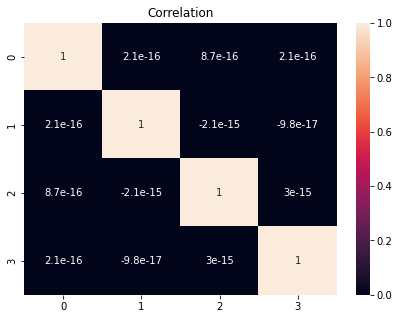

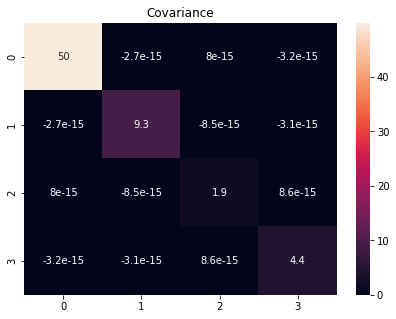

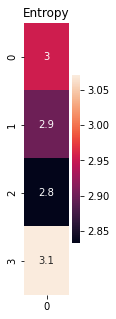

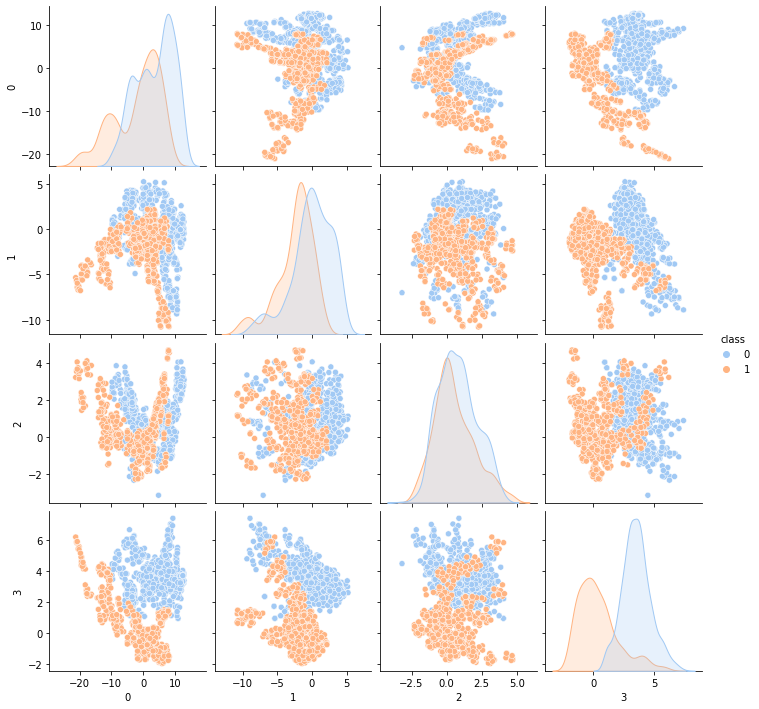

In [ ]:
#@title Space transformation (PCA)

eigenvalue, eigenvector = np_la.eig(df_cov)

pca_df = df.copy()

# Reindexing, as variable names do not apply anymore
pca_df = df.rename(columns = {x:"%d"%i for i,x in enumerate(df.columns[1:])})

pca_df.iloc[:, 1:] = np.dot(df.iloc[:,1:], eigenvector)

print("\nEingenvalues:\n",eigenvalue)

if show_data == True:
  print(pca_df)

pca_df_corr, pca_df_cov, pca_df_entrp = cor_cov_entr(pca_df)

grid = sb.pairplot(pca_df, hue = cl_name, palette = 'pastel')

**Correlation, Covariance and entropy analisys post-PCA**

- After transformations, we can observe the formation of a new variable (3) with better class separation than the former image variance, which seems promising for classification

- Entropy unfortunately didn't show much change

**Space Reduction**

After examining PCA results, i've chosen to remove variable 2. It shows the least distinguishing classes and covariance, with lowest eingenvalue. So is a good candidate as its data is by far the most clustered together among them

In [ ]:
#@title Space reduction

pca_df = pca_df.drop(columns = ['2'])
if show_data == True:
  print(pca_df)

      class          0         1         3
0         0   9.141988  1.264562  3.322089
1         0   8.824158  1.581502  3.746008
2         0  -2.666161  3.264668  1.963318
3         0  10.932646 -0.130023  2.647133
4         0  -5.933511 -0.374240  1.649444
...     ...        ...       ...       ...
1367      1   2.029223  0.157107 -0.348130
1368      1  -7.758986 -1.621882  2.223287
1369      1 -20.703397 -5.978167  5.883577
1370      1 -13.922276 -4.940367  4.259994
1371      1  -2.541213 -2.140173  0.714272

[1372 rows x 4 columns]


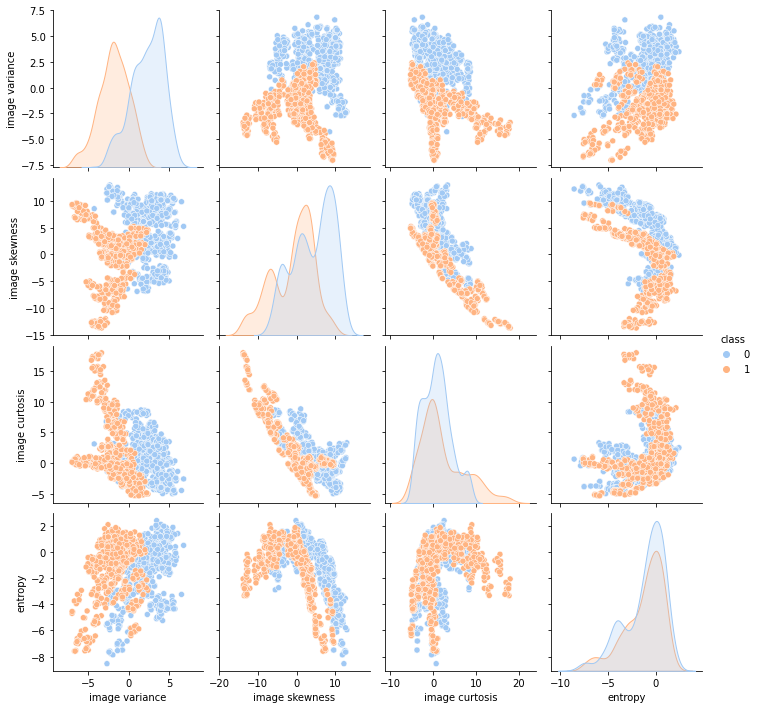

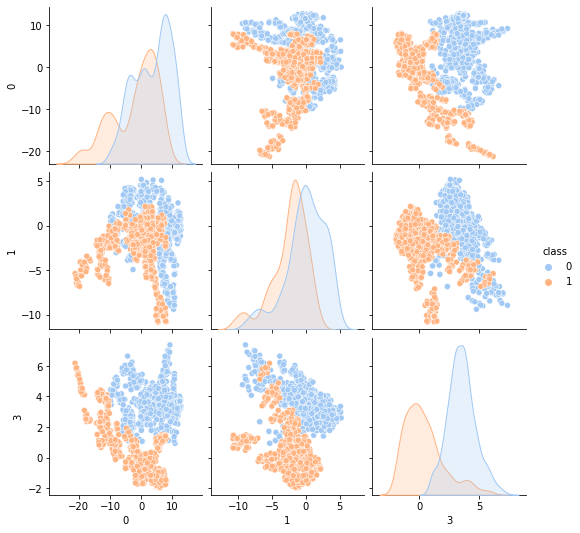

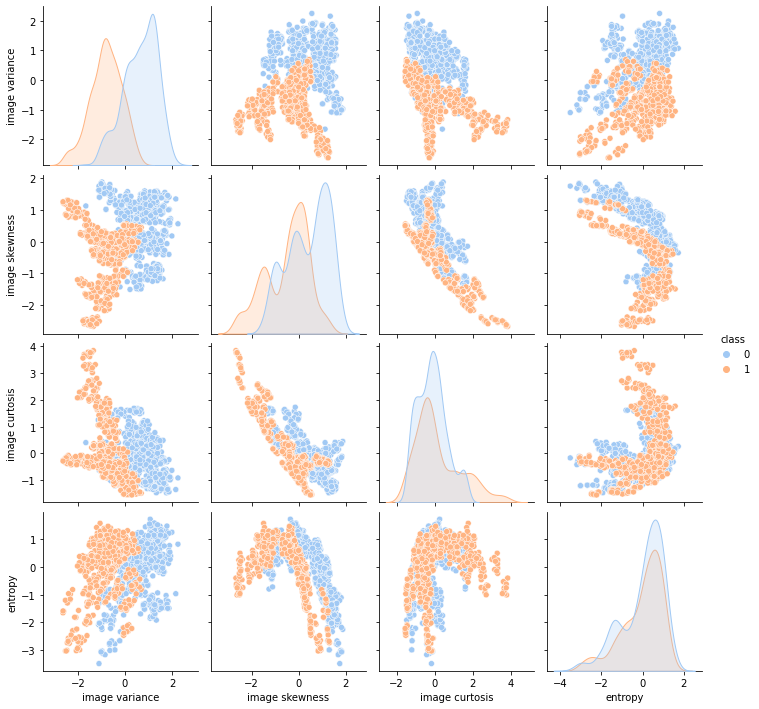

In [ ]:
#@title Normalising

n_df = df.copy()
normalizer = sk_StandardScaler()
n_df.iloc[:, 1:] = normalizer.fit_transform(n_df.iloc[:, 1:])

if show_data == True:
  grid = sb.pairplot(df, hue = cl_name, palette = 'pastel')
  grid = sb.pairplot(pca_df, hue = cl_name, palette = 'pastel')
  grid = sb.pairplot(n_df, hue = cl_name, palette = 'pastel')

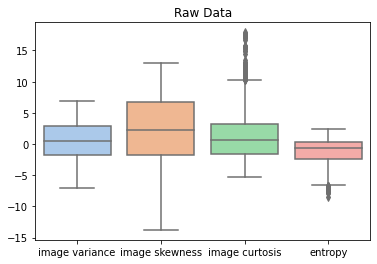

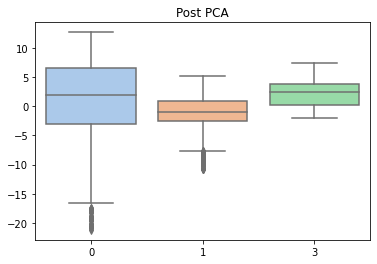

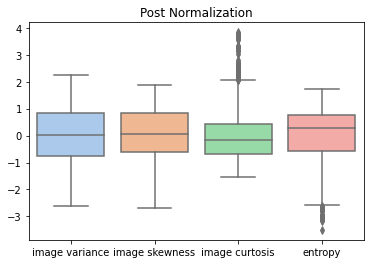

In [ ]:
#@title Box Plot Study

plt.figure()
box = sb.boxplot(data = df.iloc[:,1:], palette = 'pastel')
plt.title('Raw Data')
plt.show()
plt.figure()
box = sb.boxplot(data = pca_df.iloc[:,1:], palette = 'pastel')
plt.title('Post PCA')
plt.show()
plt.figure()
box = sb.boxplot(data = n_df.iloc[:,1:], palette = 'pastel')
plt.title('Post Normalization')
plt.show()

# Practice Optimization with GA

In [ ]:
#@title Summary and Motivation

Originally, i attempted to make a GA to solve the TSP (attempt at the end of the file), but after many problems with libraries, decided to scrape it and go with classifier optimization.

For such i implemented a KMeans classifier. The choice comes from the previous exam, where KMeans had an underwhelming performance compared to other methods

In [ ]:
#@title Chromosome and Cost Function

For the dataframe, i've chosen to use the unauthored one

Now we model the chromosomes. It is a simple chromosome with classifier parameters.

The cost function is going to be a standard train_test_split score study. Since the algorithm is a minimizer, i'm just multiplying the score by -1

In [ ]:
def f(X):

  clf = sk_KMeans(n_clusters = 2, n_init = X[0], max_iter = X[1], tol = X[2], random_state = 1)

  x_train, x_test, y_train, y_test = sk_train_test_split(df.iloc[:, 1:], df.iloc[:,0], test_size= 0.4, random_state = 1)
  clf.fit(x_train, y_train)
  score = clf.score(x_test, y_test)
  penalty = sum([0.5*X[0]>50, 0.5*(X[1]<50), 0.5*(X[1]>500)])
      
  return -score + penalty

In [ ]:
#@title Setting up the Genetic Algorithm

We are done with structuring our data and now it is time to set up the GA


In [ ]:
from geneticalgorithm import geneticalgorithm as ga

varbound = np.array([[1, 50],[10, 1000],[1e-6,1e-2]])
vartype = np.array([['int'],['int'],['real']])


algorithm_param = {'max_num_iteration': 1000,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

model=ga(function=f,dimension=3,
        variable_type_mixed=vartype,
        variable_boundaries=varbound,
        algorithm_parameters=algorithm_param)

model.run()

ModuleNotFoundError: ignored

# Fuzzy Control Problem

In [ ]:
#@title Summary and Motivation

Autonomous drones are getting ever more ubiquitous, and as such, such systems need to be prepared to decide by themselves which strategy to approach according to a series of data.

Here i propose a simple decision frame for a drone configured to rover around a gps focal point to decide how far it should stray from the source.

To do so, i am considering a series of readings: ***Battery charge, communication signal strength and power consumption***

Variables were chosen according to how much they might influence the flight stability and control

In [ ]:
!pip install scikit-fuzzy

In [ ]:
#@title Setting variables

In [ ]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as skf_ctrl

# Objects

# Assuming a battery with BMS, we only need to check a single cell
bat_chr = skf_ctrl.Antecedent(np.arange(3, 4.2, 0.2), 'bat_chr') # Volts
sig_str = skf_ctrl.Antecedent(np.arange(0, 1, 0.1), 'sig_str') # Percent
pwr_cons = skf_ctrl.Antecedent(np.arange(0, 18, 3), 'pwr_cons') # Watts

end_dist = skf_ctrl.Consequent(np.arange(0, 500, 50), 'end_dist') # Meters

# Membership

bat_chr['low'] = skf.trimf(bat_charge.universe, [3, 3.2, 3.4])
bat_chr['med'] = skf.trapmf(bat_charge.universe,[3.4, 3.6, 3.8, 4])
bat_chr['high'] = skf.trimf(bat_charge.universe,[3.8, 4, 4.2])


sig_str['low'] = skf.trapmf(sig_str.universe,[0, 0.1, 0.2, 0.3])
sig_str['med'] = skf.trapmf(sig_str.universe,[0.2, 0.4, 0.6, 0.8])
sig_str['high'] = skf.trapmf(sig_str.universe,[0.7, 0.8, 0.9, 1])

pwr_cons['low'] = skf.trapmf(pwr_cons.universe,[0, 3, 6, 9])
pwr_cons['med'] = skf.trapmf(pwr_cons.universe,[6, 9, 12, 15])
pwr_cons['high'] = skf.trapmf(pwr_cons.universe,[9, 12, 15, 18])

end_dist['close'] = skf.trapmf(end_dist.universe,[0, 50, 100, 150])
end_dist['mid-close'] = skf.trapmf(end_dist.universe,[100, 150, 200, 250])
end_dist['mid-far'] = skf.trapmf(end_dist.universe,[200, 250, 300, 350])
end_dist['far'] = skf.trapmf(end_dist.universe,[350, 400, 450, 500])

bat_chr.view()
sig_str.view()
pwr_cons.view()
end_dist.view()

In [ ]:
#@title Setting rules

In [ ]:
rules = [skf_ctrl.Rule(bat_chr['low'], end_dist['close']),
        skf_ctrl.Rule(sig_str['low'], end_dist['close']),
        skf_ctrl.Rule(bat_chr['med'] & sig_str['med'], end_dist['mid-close']),
        skf_ctrl.Rule(bat_chr['med'] & sig_str['high'], end_dist['mid-far']),
        skf_ctrl.Rule(bat_chr['high'] & sig_str['med'], end_dist['mid-close']),
        skf_ctrl.Rule(bat_chr['high'] & sig_str['high'], end_dist['far']),
        skf_ctrl.Rule(bat_chr['med'] & pwr_cons['low'], end_dist['mid-far']),
        skf_ctrl.Rule(bat_chr['high'] & pwr_cons['low'], end_dist['mid-far']),
        skf_ctrl.Rule(bat_chr['med'] & pwr_cons['med'], end_dist['mid-far']),
        skf_ctrl.Rule(bat_chr['high'] & pwr_cons['med'], end_dist['far']),
        skf_ctrl.Rule(bat_chr['med'] & pwr_cons['high'], end_dist['close']),
        skf_ctrl.Rule(bat_chr['high'] & pwr_cons['high'], end_dist['mid-close'])]

In [ ]:
#@title Deffusify

In [ ]:
test = [{'bat_chr': 3.3,'sig_str': 0.6, 'pwr_cons':12},
        {'bat_chr': 3.44,'sig_str': 0.6, 'pwr_cons':12},
        {'bat_chr': 4,'sig_str': 0.1, 'pwr_cons':12},
        {'bat_chr': 4,'sig_str': 0.6, 'pwr_cons':12},
        {'bat_chr': 3.8,'sig_str': 0.6, 'pwr_cons':18},
        {'bat_chr': 4,'sig_str': 0.6, 'pwr_cons':6},
        {'bat_chr': 4,'sig_str': 0.7, 'pwr_cons':3}
        ]

end_dist_ctrl = skf_ctrl.ControlSystem(rules)
move = skf_ctrl.ControlSystemSimulation(end_dist_ctrl)

for values in test:
  move.inputs(values)
  move.compute()
  print(values, move.output['end_dist'])
  end_dist.view(sim = move)

# Historical

In [ ]:
#@title Summary and Motivation

For this work, i am trying to write an Genetic Algorithm optimizer for random instances of a ***travelling salesman*** setting.

Mathematically, the travelling salesman problem asks for a graph traversal algorithm given edge weights where each vertex is visited only once. The problem consists of finding the shortest path.

That is, given a set of cities and their pairwise distances, find the shortest path visiting all cities, while visiting each city only once

It is an essential challenge in industry, not only applicable in obvious instances like charting driving routes, since it is an NP-Hard problem and most computationally costly problems can be reduced to it.

Although thoroughly studied, and this implementation adding nothing of relevant or new, i believe it fits well for the purposes of practicing and sets a good basis

In [ ]:
#@title formatting data

First and foremost we must set the data structure. Here for simplicity i am starting with a simple matrix where indexes identify vertices/cities. 

We could just reformat a database of city distances (or other weight parameter), but to keep it simple, i'm randomly generating it

Here there is a function with the number of vertices/cities and weight/max distance between them as parameters. It just generates a symmetric matrix, as i'm starting from the principle of both way roads, but it is not necessary. Also, i set the main diagonal to be zeros, i.e, the weight from a city to itself is zero.

In [ ]:
import numpy as np

# Defines how many vertices/cities we have
vn = 5
# Defines max weight/distances between vertices/cities
mw = 100

def start_vertices_list(vertices_number, max_weight):
  edge_weight  = np.random.randint(max_weight, size = (vertices_number, vertices_number))
  for i in range(vertices_number):
    edge_weight[i,i] = 0

  edge_weight = (edge_weight + edge_weight.T)/2

  return edge_weight

weights = start_vertices_list(vn, mw)
print (weights)

In [ ]:
#@title Chromosome and Cost Function

Now we model the chromosomes. It comes so early just so we can plan better for the GA. For it, we need to pay attention to 2 main characteristics:

1. All vertices must be there

2. All vertices show up only once

Again the simple approach, i'm going with a permutation of the vertex set. As such, we may get rid of lines 10 and 11 in the previous code, as there is no repetition, but for now i'm leaving it there in case i write something weird

Chromosome set, now we build a cost function. For such, we just get the vertices two by two and add up weights

In [ ]:
def f(X):
  sum = 0
  for i in range(vn - 1):
    sum += weights[X[i], X[i + 1]]
    
  return sum

In [ ]:
#@title Setting up the Genetic Algorithm

We are done with structuring our data and now it is time to set up the GA

`A big problem showed up. Although the page of the library used in class says it can solve combinatorial problems, reading it, i don't believe it is actually implemented. Hence i went on searching for a good replacement, and found such`

---



In [ ]:
!pip install rtree
!pip install pyturf
!pip install geneal

For the new libraries, we first need to convert the adjacency matrix representation into an specific graph datatype. For such we use the networkx library

futhermore, now we may solve the problem


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
import pandas as pd

#G = nx.from_numpy_matrix (weights, create_using = nx.DiGraph())

#nx.draw_networkx(G)

G = pd.read_csv('https://github.com/diogomatoschaves/geneal/blob/master/data/world_capitals.csv')
from geneal.applications.tsp.travelling_salesman_problem import TravellingSalesmanProblemSolver

tsp_solver = TravellingSalesmanProblemSolver(
    graph=G,
    pop_size=10, # population size (number of individuals)
    max_gen=50, # maximum number of generations
    mutation_rate=0.05, # mutation rate to apply to the population
    selection_rate=0.5, # percentage of the population to select for mating
    selection_strategy="tournament", # strategy to use for selection.
    mutation_strategy="random_inversion" # strategy to use for mutation. see below for more details.
)

tsp_solver.solve()

print(solver.best_individual_)